In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
# Here we can note that none of the columns has null values, so we dont have to worry about imputing values.

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Visually analyse the data**

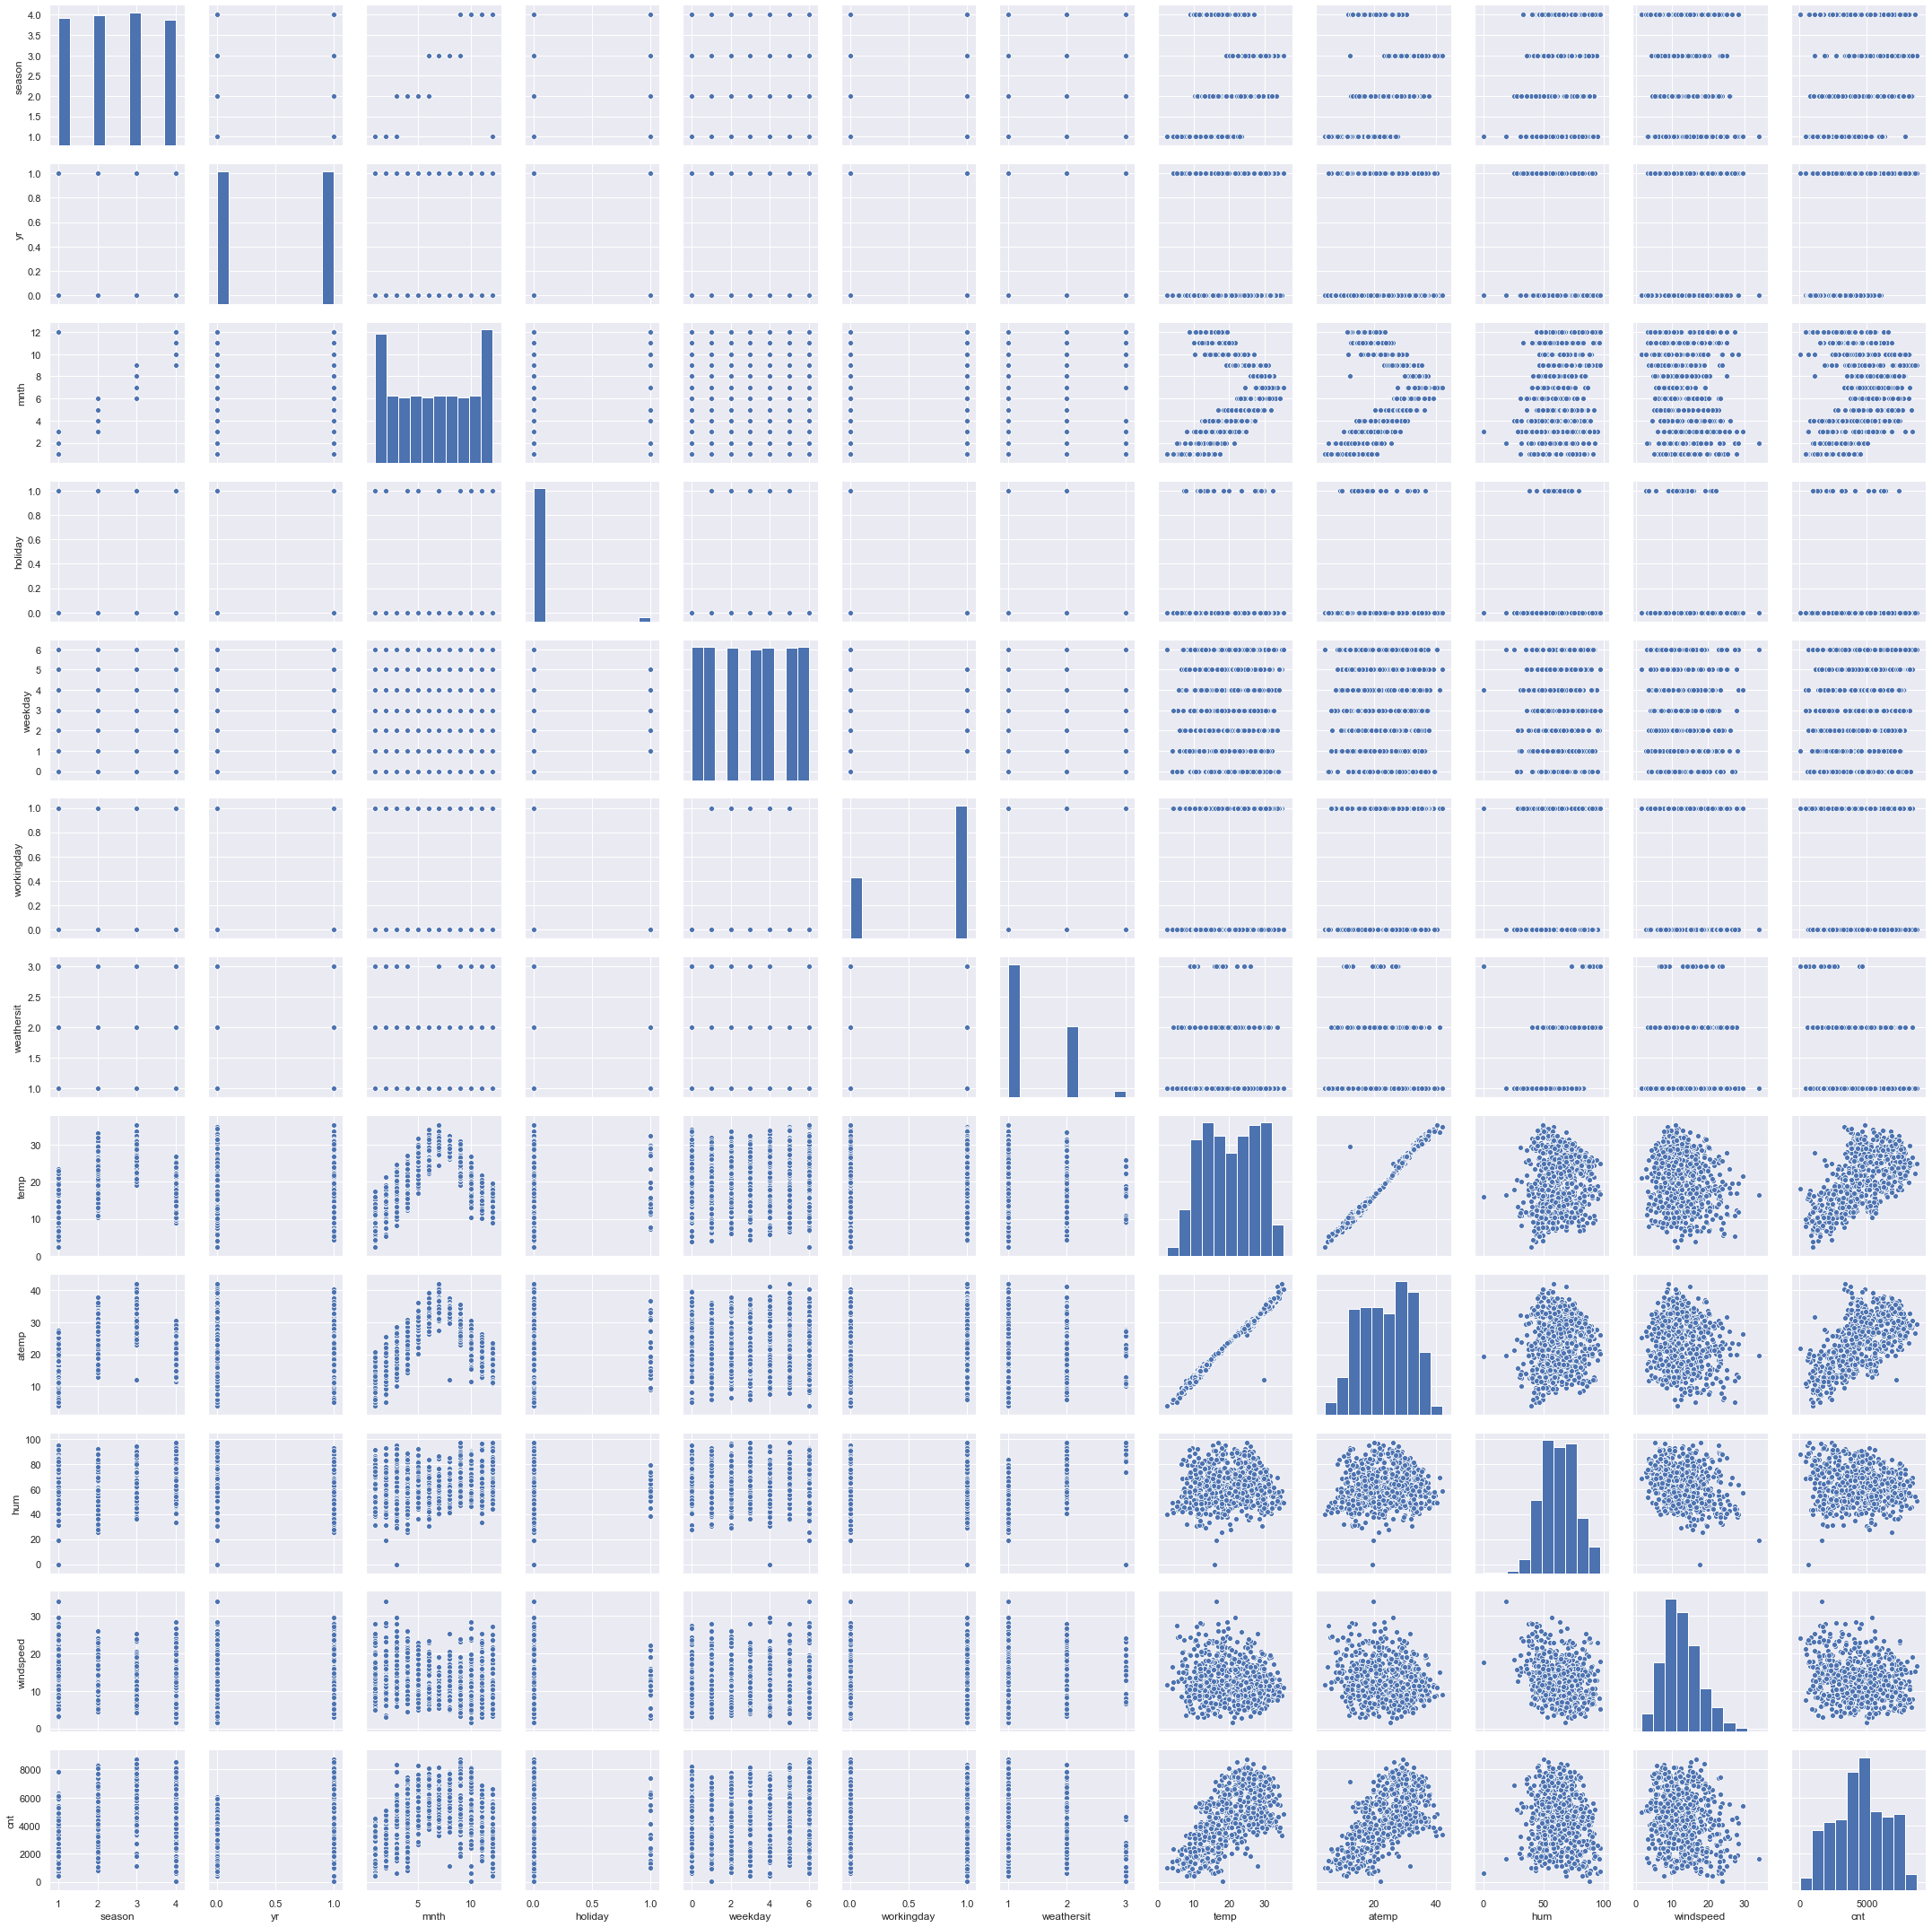

In [6]:
sns.pairplot(bikes)

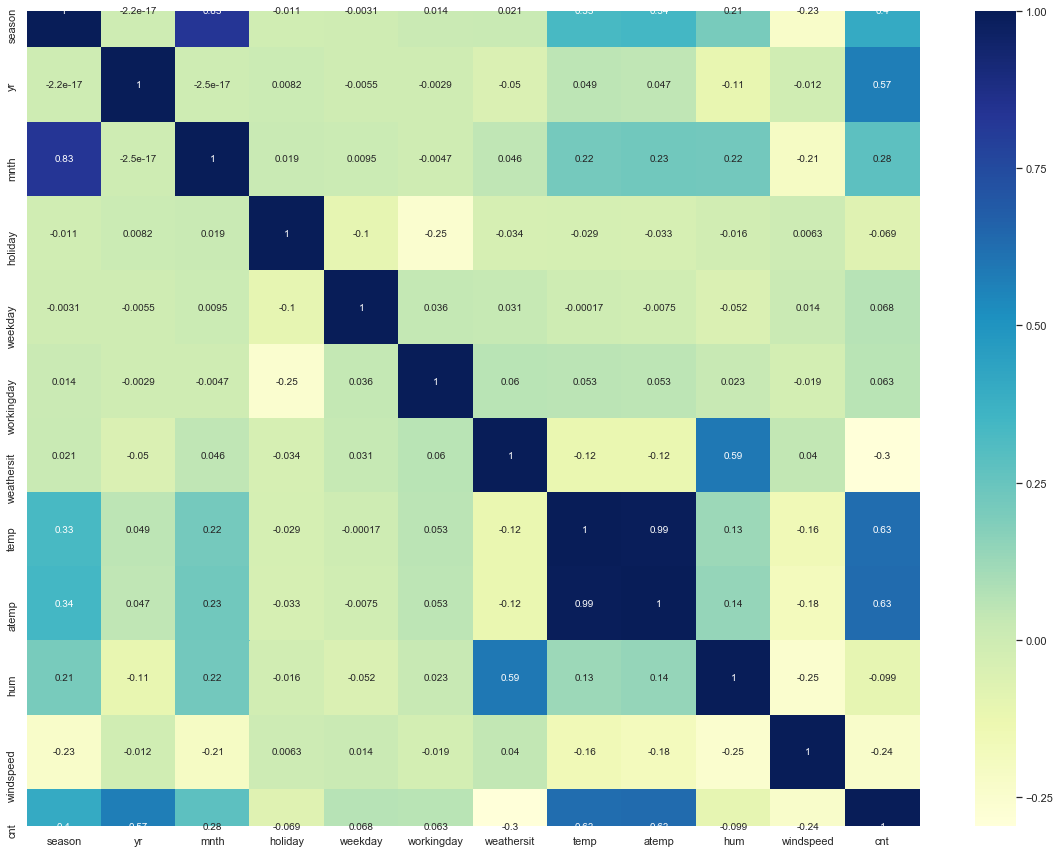

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(bikes.corr(), annot=True, cmap='YlGnBu')

In [8]:
bikes.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

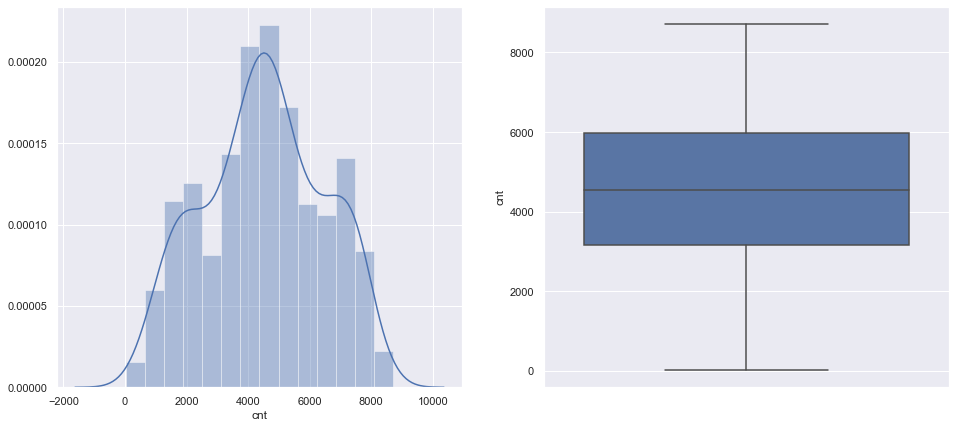

In [9]:
# Lets see how the data is distributed for the cnt column.
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.distplot(bikes.cnt)
plt.subplot(1,2,2)
sns.boxplot(y=bikes.cnt)
plt.show()

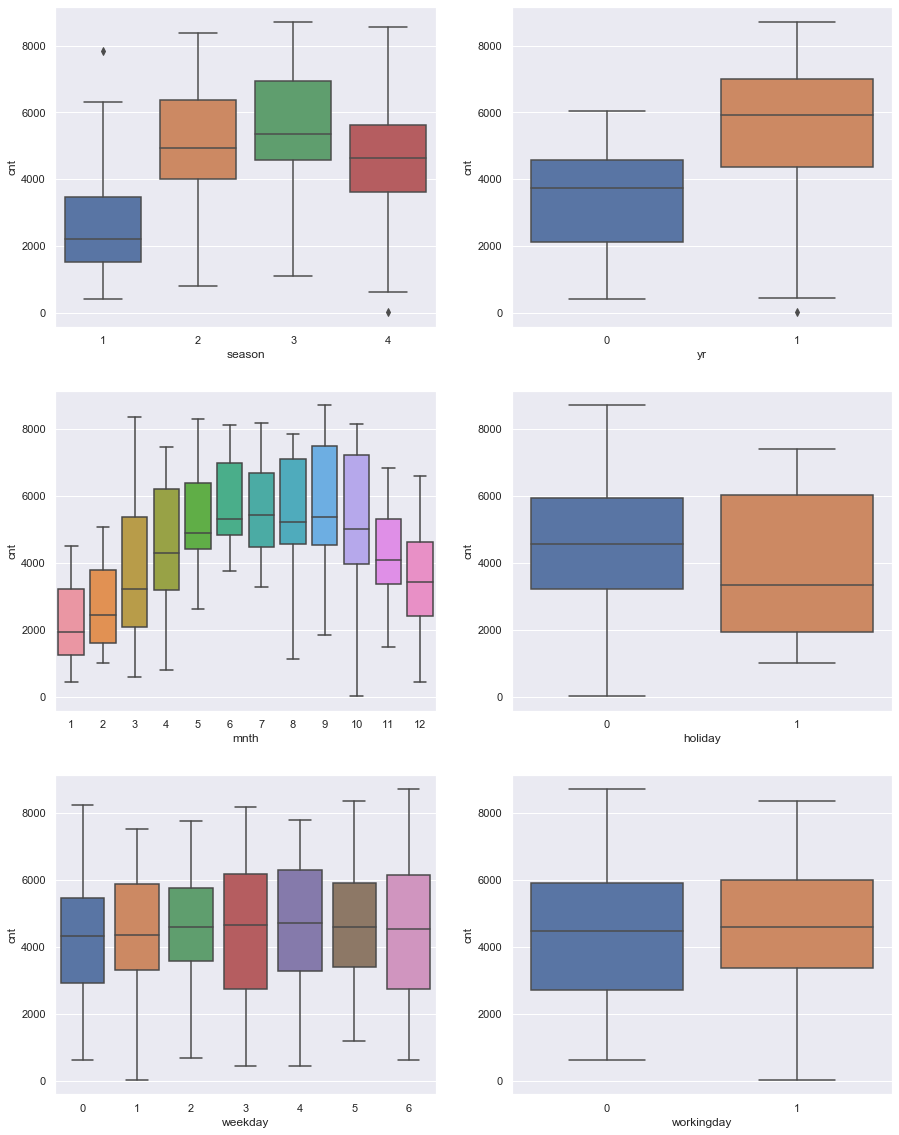

In [10]:
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']
plt.figure(figsize = (15,20))
for i in enumerate(features):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x = i[1], y = bikes.cnt, data = bikes)

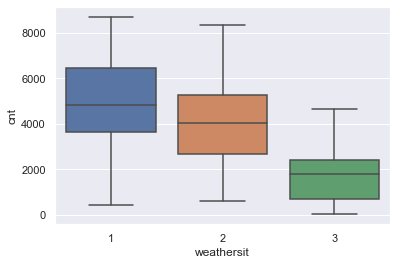

In [11]:
sns.boxplot(x = bikes.weathersit, y = bikes.cnt, data = bikes)

In [ ]:
# instant, dteday, casual and registered columns are not required, hence they are droped.

bikes.drop(['instant', 'dteday', 'casual', 'registered'], inplace=True, axis=1)

In [12]:
#Creating Dummy variables
bikes = pd.get_dummies(bikes, columns=['season', 'mnth','weekday', 'weathersit'], drop_first=True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**Build the model**

In [13]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

np.random.seed(0)

In [14]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
def statsmodel(data):
    X_train_lm = sm.add_constant(data)
    
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    return lr

In [16]:
def vifCalc(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [17]:
# Using min max scaler to scale the values between 0-1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [18]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [19]:
y_train = df_train.pop('cnt')
X_train = df_train

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [21]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [22]:
col = X_train.columns[rfe.support_]
print(col)
print(X_train.columns[~rfe.support_])

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')
Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')


In [23]:
X_train1 = X_train[col]

In [24]:
model1 = statsmodel(X_train1)

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.89e-191
Time:                        20:58:52   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791      0.000       0.139       0.251
yr               0.2301      0.008     28.776      0.000       0.214       0.246
holiday         -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday       0.0446      0.012      3.877      0.000       0.022       0.067
temp             0.4960      0.034     14.803      0.000       0.430       0.562
hum             -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed       -0.1824      0.025     -7.200      0.000      -0.232      -0.133
season_2         0.1175      0.015      7.985      0.000       0.089       0.146
season_3         0.0295      0.022      1.346      0.179      -0.014       0.073
season_4         0.1430      0.013     10.688      0.000       0.117       0.169
mnth_8           0.0475      0.017      2.745      0.006       0.013       0.081
mnth_9           0.1178      0.017      6.895      0.000       0.084       0.151
mnth_10          0.0442      0.017      2.565      0.011       0.010       0.078
weekday_6        0.0533      0.015      3.676      0.000       0.025       0.082
weathersit_2    -0.0592      0.010     -5.702      0.000      -0.080      -0.039
weathersit_3    -0.2523      0.026     -9.655      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
vif1 = vifCalc(X_train1)
vif1

,Features,VIF
3,temp,24.06
4,hum,17.47
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.44
8,season_4,2.88
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.90


In [27]:
# Dropping column with high p-Value
X_train2 = X_train1.drop(['season_3'], axis = 1)

In [28]:
model2 = statsmodel(X_train2)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.24e-192
Time:                        20:58:52   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770      0.000       0.138       0.251
yr               0.2292      0.008     28.743      0.000       0.213       0.245
holiday         -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday       0.0444      0.012      3.850      0.000       0.022       0.067
temp             0.5301      0.022     24.136      0.000       0.487       0.573
hum             -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed       -0.1857      0.025     -7.359      0.000      -0.235      -0.136
season_2         0.1039      0.011      9.680      0.000       0.083       0.125
season_4         0.1348      0.012     11.316      0.000       0.111       0.158
mnth_8           0.0560      0.016      3.478      0.001       0.024       0.088
mnth_9           0.1255      0.016      7.783      0.000       0.094       0.157
mnth_10          0.0411      0.017      2.403      0.017       0.007       0.075
weekday_6        0.0529      0.015      3.647      0.000       0.024       0.081
weathersit_2    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_3    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif2 = vifCalc(X_train2)
vif2

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_4,2.27
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.83
10,mnth_10,1.62


In [30]:
# Dropping columns with high VIF value
X_train3 = X_train2.drop(['hum'], axis = 1)

In [31]:
model3 = statsmodel(X_train3)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          6.16e-189
Time:                        20:58:52   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961      0.000       0.057       0.132
yr               0.2329      0.008     28.799      0.000       0.217       0.249
holiday         -0.0543      0.027     -1.982      0.048      -0.108      -0.000
workingday       0.0475      0.012      4.045      0.000       0.024       0.070
temp             0.5099      0.022     23.236      0.000       0.467       0.553
windspeed       -0.1532      0.025     -6.203      0.000      -0.202      -0.105
season_2         0.1008      0.011      9.226      0.000       0.079       0.122
season_4         0.1267      0.012     10.544      0.000       0.103       0.150
mnth_8           0.0542      0.016      3.305      0.001       0.022       0.086
mnth_9           0.1189      0.016      7.259      0.000       0.087       0.151
mnth_10          0.0371      0.017      2.132      0.033       0.003       0.071
weekday_6        0.0580      0.015      3.931      0.000       0.029       0.087
weathersit_2    -0.0854      0.009     -9.839      0.000      -0.102      -0.068
weathersit_3    -0.2942      0.025    -12.009      0.000      -0.342      -0.246
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.937
Skew:                          -0.704   Prob(JB):                     2.30e-39
Kurtosis:                       5.528   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif3 = vifCalc(X_train3)
vif3

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_4,2.02
5,season_2,1.82
10,weekday_6,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weathersit_2,1.54


In [33]:
# Dropping columns with high VIF-Value
X_train4 = X_train3.drop(['temp'], axis = 1)

In [34]:
model4 = statsmodel(X_train4)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     83.87
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.91e-111
Time:                        20:58:52   Log-Likelihood:                 320.78
No. Observations:                 510   AIC:                            -615.6
Df Residuals:                     497   BIC:                            -560.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3649      0.022     16.747      0.000       0.322       0.408
yr               0.2501      0.012     21.507      0.000       0.227       0.273
holiday         -0.0785      0.040     -1.986      0.048      -0.156      -0.001
workingday       0.0490      0.017      2.893      0.004       0.016       0.082
windspeed       -0.2503      0.035     -7.122      0.000      -0.319      -0.181
season_2         0.1671      0.015     10.968      0.000       0.137       0.197
season_4         0.0813      0.017      4.750      0.000       0.048       0.115
mnth_8           0.2213      0.021     10.386      0.000       0.179       0.263
mnth_9           0.2432      0.022     10.887      0.000       0.199       0.287
mnth_10          0.1145      0.025      4.638      0.000       0.066       0.163
weekday_6        0.0503      0.021      2.363      0.019       0.008       0.092
weathersit_2    -0.1158      0.012     -9.353      0.000      -0.140      -0.091
weathersit_3    -0.3074      0.035     -8.693      0.000      -0.377      -0.238
==============================================================================
Omnibus:                        5.841   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                8.065
Skew:                          -0.016   Prob(JB):                       0.0177
Kurtosis:                       3.615   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif4 = vifCalc(X_train4)
vif4

,Features,VIF
2,workingday,3.53
3,windspeed,3.41
5,season_4,2.01
0,yr,1.91
9,weekday_6,1.61
4,season_2,1.60
8,mnth_10,1.57
10,weathersit_2,1.54
6,mnth_8,1.24
7,mnth_9,1.16


In [36]:
X_train4.columns

Index(['yr', 'holiday', 'workingday', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

**Residual Analysis**

In [37]:
lm = sm.OLS(y_train, X_train4).fit()
y_train_cnt = lm.predict(X_train4)

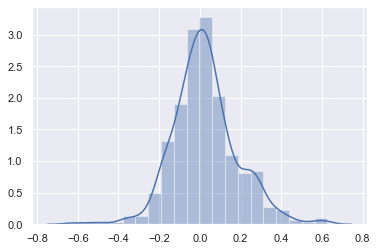

In [38]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)

**Making Predictions**

In [39]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [40]:
y_test = df_test.pop('cnt')
X_test = df_test

In [41]:
X_test_new = X_test[X_train4.columns]
X_test_new = sm.add_constant(X_test_new)

In [42]:
y_pred = model4.predict(X_test_new)

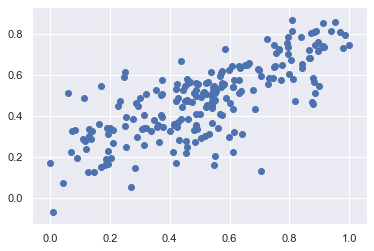

In [43]:
fig = plt.figure()
plt.scatter(y_test,y_pred)

In [44]:
residuals = y_train.values-y_train_cnt.values

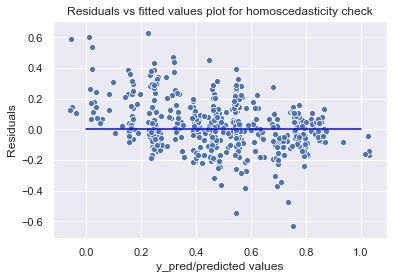

In [45]:
p = sns.scatterplot(y_train_cnt,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Our deciding factor are:**
    1. yr
    2. holiday
    3. workingday
    4. windspeed
    5. season_2
    6. season_4
    7. mnth_8
    8. mnth_9
    9. mnth_10
    10. weekday_6
    11. weathersit_2
    12. weathersit_3'

The final equation of the for our best fitted line for predicting price would be -
    **cnt = (0.2501 x yr) + (-0.0785 x holiday) + (0.0490 x workingday) + (-0.2503 x windspeed) + (0.1671 x season_2) + 
            (0.0813 x season_4) + (0.2213 x mnth_8) + (0.2432 x mnth_9) + (0.1145 x mnth_10) + (0.0503 x weekday_6) + 
            (-0.0854 x weathersit_2) + (-0.3074 x weathersit_3) + 0.3649**